<a href="https://colab.research.google.com/github/EmmanuelABonsu/CE888/blob/main/src/project/evaluate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Import Libraries
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sn

In [3]:
# Load Fine Tuned Model
model = keras.models.load_model('drive/MyDrive/trained_model/fine_tuned_xception_model.h5')

In [4]:
# Define path to test data 
test_path = "drive/MyDrive/CE888_data/Test"

In [5]:
# Initialize tess data pipeline
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
        test_path,
        target_size=(254, 254),
        shuffle = False,
        class_mode='binary',
        batch_size=32)

Found 8617 images belonging to 2 classes.


In [ ]:
# Evaluate model 
model.evaluate(test_generator)

In [7]:
# Generate predictions on test data
test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)
predictions = model.predict_generator(test_generator, steps=test_steps_per_epoch)


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


NameError: ignored

In [ ]:
# Converting predionts into model labels [0, 1]
pred_list = list(predictions)
predicted_classes = [1 if entry > 0 else 0 for entry in pred_list]

In [ ]:
# Extracting true classes,[0, 1] from test generator 
true_classes = test_generator.classes

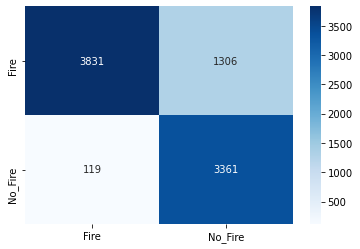

In [39]:
# Plotting Confusion Matrix
cm=confusion_matrix(true_classes,p)
sn.heatmap(cm,annot=True,cmap='Blues', fmt='g',xticklabels=['Fire', 'No_Fire'], yticklabels=['Fire', 'No_Fire']) #Fire --> 0 and No_Fire --> 1